The objective of this competition is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key factors driving individuals’ financial security.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
np.random.seed(123)
warnings.filterwarnings('ignore')
%matplotlib inline


In [5]:
#load the train and test dataset
train=pd.read_csv('Train.csv')
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
test=pd.read_csv('Test.csv')
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [7]:
train.shape

(23524, 13)

In [8]:
#understand the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [ ]:
#data preparation for machine learning
#Data cleaning and preprocessing

we separate the independent variablea and target(bank_account)from the train data.Then transform the target values from the object data type into numerical by using LabelEncoder.

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
#convert the target label to numerical data
le=LabelEncoder()
train['bank_account']=le.fit_transform(train['bank_account'])

#separate training fearures from target
X_train=train.drop(['bank_account'], axis=1)
Y_train=train['bank_account']

Y_train


0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64

In [12]:
#function to preprocess our data from train models

def preprocessing_data(data):
    #convert the following numeric labels from interger to float types
    float_array=data[['household_size','age_of_respondent','year']]

    #categorical features to be converted to one Hot Encoding
    categ=[
        "relationship_with_head",
        "marital_status",
        "education_level",
        "job_type",
        "country"
    ]
    #One Hot Encoding conversation
    data=pd.get_dummies(data,prefix_sep="_",columns=categ)

    #Label Encoder conversion
    data["location_type"]=le.fit_transform(data["location_type"])
    data["cellphone_access"]=le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"]=le.fit_transform(data["gender_of_respondent"])
    
    #drop uniqueid column
    data=data.drop(["uniqueid"],axis=1)
    
    #scale our data into range of 0 and 1
    scaler=MinMaxScaler(feature_range=(0,1))
    data=scaler.fit_transform(data)
    

    return data




In [13]:
#preprocess and retrain the data
processed_train=preprocessing_data(X_train)
processed_train[:1]

array([[1.       , 0.       , 1.       , 0.1      , 0.0952381, 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 1.       ,
        0.       , 0.       , 1.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 1.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 1.       , 1.       , 0.       , 0.       ,
        0.       ]])

In [14]:
processed_test=preprocessing_data(test)
processed_test[:1]

array([[1.        , 1.        , 1.        , 0.10526316, 0.16666667,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        ]])

In [15]:
processed_train.shape

(23524, 37)

Now we have more independent variables than before (37 variables). This doesn’t mean all these variables are important to train our model. You need to select only important features that can increase the performance of the model

4.Model building and Experiments

A portion of the train data set will be used to evaluate our models and find the best one that performs well before using it in the test dataset.


In [20]:
#split train_data
from sklearn.model_selection import train_test_split

X_Train,X_val,y_Train,y_val=train_test_split(processed_train,Y_train,stratify=Y_train,test_size=0.1,random_state=42)

In [ ]:
X_val

Only 10% of the train dataset will be used for evaluating the models. The parameter stratify = y_train will ensure an equal balance of values from both classes (‘yes’ and ‘no’) for both train and validation set.

We have selected five algorithms for this classification problem to train and predict who is most likely to have a bank account.

Random 

K Nearest Neighbors

Logistic Regression

Extra Trees

XGBoost

In [18]:
#import classifier algorithm here
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

In [ ]:
# create models
lg_model = LogisticRegression()
rf_model = RandomForestClassifier()
kn_model = KNeighborsClassifier()
et_model = ExtraTreesClassifier()
xg_model = XGBClassifier()


#fitting the models
lg_model.fit(X_Train,y_Train)
rf_model.fit(X_Train,y_Train)
kn_model.fit(X_Train,y_Train)
et_model.fit(X_Train,y_Train)
xg_model.fit(X_Train,y_Train)

After training five models, let’s use the trained models to predict our evaluation set and see how these models perform.

The evaluation metric for this challenge will be the percentage of survey respondents for whom you predict the binary 'bank account' classification incorrectly.
This means the lower the incorrect percentage we get, the better the model performance.


In [22]:
# import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score

# evaluate the model
lg_y_pred = lg_model.predict(X_val)
rf_y_pred = rf_model.predict(X_val)
kn_y_model = kn_model.predict(X_val)
et_y_model = et_model.predict(X_val)
xg_y_model = xg_model.predict(X_val)
print("Error rate Logistic Regression classifier: ", 1 - accuracy_score(y_val,lg_y_pred))
print("Error rate of Random Forest classifier: ", 1 - accuracy_score(y_val, rf_y_pred))
print("Error rate of Extra Tree classifier: ", 1 - accuracy_score(y_val, et_y_model))
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_val, xg_y_model))



Error rate Logistic Regression classifier:  0.11219719507012327
Error rate of Random Forest classifier:  0.1368465788355291
Error rate of Extra Tree classifier:  0.14747131321716955
Error rate of XGB classifier:  0.10752231194220141


XGBoost classifier performs better than other models with 0.110 incorrect.

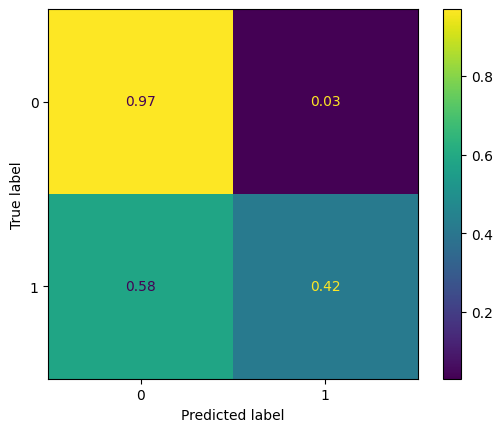

In [24]:
#lets check the consufion matrix for XGB model
from sklearn.metrics import plot_confusion_matrix
#Get confusion matrix for Gradient booster classifier
plot_confusion_matrix(xg_model,X_val,y_val,normalize='true')

Our XGBoost model performs well on predicting class 0 and performs poorly on predicting class 1, it may be caused by the imbalance of data provided(the target variable has more ‘No’ values than ‘Yes’ values). 

One way to increase the model performance is by applying the Grid search method as an approach to parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid

Making the first submission
After improving the XGBoost model performance, let’s now see how the model performs on the competition test data set provided and how we rank on the competition leaderboard.

In [26]:
#get the predicted result for the test data
test.bank_account=xg_model.predict(processed_test)


In [27]:
#submission dataframe
submission=pd.DataFrame({"uniqueid": test["uniqueid"] + "x" + test["country"],"bank_account":test.bank_account})
submission.sample(5)

,uniqueid,bank_account
415,uniqueid_6484xKenya,0
5296,uniqueid_11431xRwanda,0
6820,uniqueid_7095xTanzania,0
4300,uniqueid_10435xRwanda,0
8934,uniqueid_9209xTanzania,0


In [ ]:
submission.to_csv('MyFirst_Submission.csv',index=False)